In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# fp = "/storage/agrp/dreyet/f_delphes/data/JZ_ATLAS/train_JZ3-6.root"
# fp = "/storage/agrp/dreyet/f_delphes/data/JZ_ATLAS/train_JZ1-8.root"
fp = "/storage/agrp/dreyet/f_delphes/data/JZ_ATLAS/train_JZ7-8.root"

f = uproot.open(fp)
tree = f["evt_tree"]

npflow = tree.arrays("npflow", library="np")["npflow"]
ntruth = tree.arrays("ntruth", library="np")["ntruth"]

pflow_pt = tree.arrays("pflow_pt", library="np")["pflow_pt"]
truth_pt = tree.arrays("truth_pt", library="np")["truth_pt"]

pflow_cl = tree.arrays("pflow_class", library="np")["pflow_class"]
truth_cl = tree.arrays("truth_class", library="np")["truth_class"]

truth_jet_pt = tree.arrays("truth_jets_pt", library="np")["truth_jets_pt"]

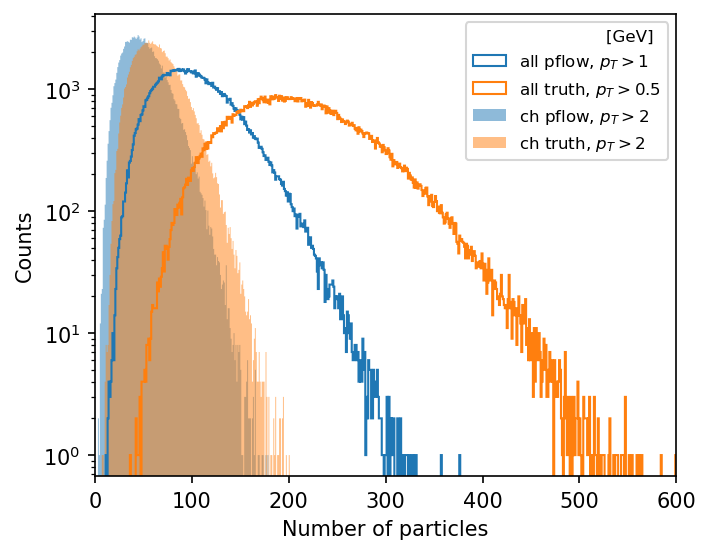

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
Nmax = 600
colors = ['C0', 'C1']
npflow_charged = np.array([np.sum((pt > 2) & (cl < 3)) for cl, pt in zip(pflow_cl, pflow_pt)])
ntruth_charged = np.array([np.sum((pt > 2) & (cl < 3)) for cl, pt in zip(truth_cl, truth_pt)])
ax.hist(npflow, bins=Nmax, range=(0, Nmax), histtype="step", label="all pflow, $p_T > 1$", color=colors[0])
ax.hist(ntruth, bins=Nmax, range=(0, Nmax), histtype="step", label="all truth, $p_T > 0.5$", color=colors[1])
ax.hist(npflow_charged, bins=Nmax, range=(0, Nmax), histtype="stepfilled", label="ch pflow, $p_T > 2$", color=colors[0], alpha=0.5)
ax.hist(ntruth_charged, bins=Nmax, range=(0, Nmax), histtype="stepfilled", label="ch truth, $p_T > 2$", color=colors[1], alpha=0.5)
ax.set_xlabel("Number of particles")
ax.set_ylabel("Counts")
ax.set_xlim(0, Nmax)
ax.set_yscale("log")
ax.legend(loc="upper right", fontsize=8, ncol=1, title="                        [GeV]", title_fontsize=8)

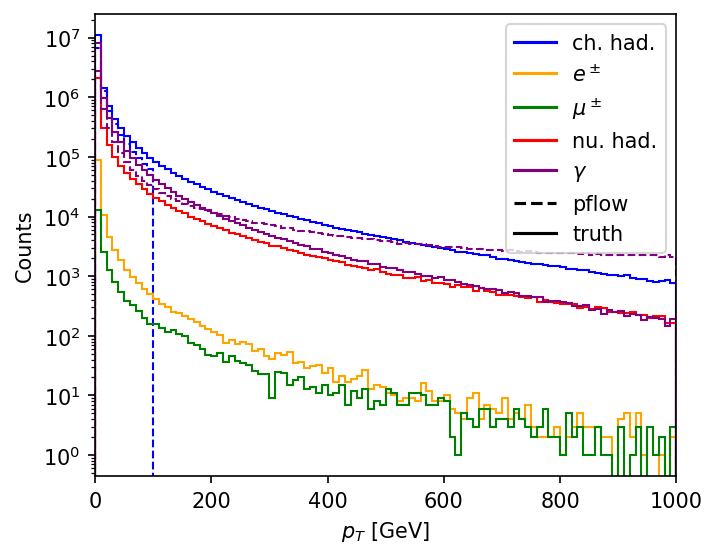

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
Nbins = 100
max_pt = 1000
labels = ["ch. had.", "$e^\pm$", "$\mu^\pm$", "nu. had.", "$\gamma$"]
colors = ["blue", "orange", "green", "red", "purple"]
for cl in range(5):
    pflow_mask = np.hstack(pflow_cl) == cl
    truth_mask = np.hstack(truth_cl) == cl
    if pflow_mask.sum() > 0:
        pflow_pt_cl = np.hstack(pflow_pt)[pflow_mask]
        ax.hist(pflow_pt_cl, bins=Nbins, range=(0, max_pt), histtype="step", color=colors[cl], linestyle="--")
    if truth_mask.sum() > 0:
        truth_pt_cl = np.hstack(truth_pt)[truth_mask]
        ax.hist(truth_pt_cl, bins=Nbins, range=(0, max_pt), histtype="step", color=colors[cl])
    ax.plot([], [], color=colors[cl], label=labels[cl], ls="-")

ax.plot([], [], color="black", label="pflow", ls="--")
ax.plot([], [], color="black", label="truth", ls="-")
ax.set_xlabel("$p_T$ [GeV]")
ax.set_ylabel("Counts")
ax.set_xlim(0, max_pt)
ax.set_yscale("log")
ax.legend()
plt.show()

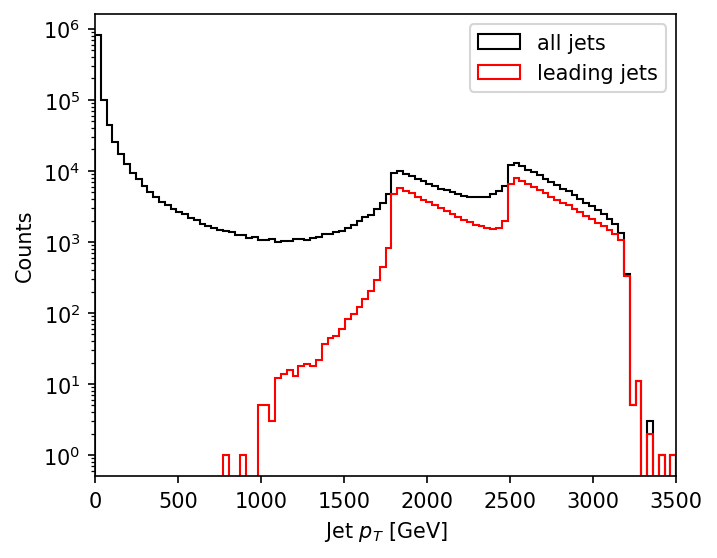

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=150)
Nbins = 100
max_pt = 3500

### plot truth_jet_pt

lead_jet_pt = []
for i in range(len(truth_jet_pt)):
    if len(truth_jet_pt[i]) > 0:
        lead_jet_pt.append(truth_jet_pt[i][0])
    else:
        lead_jet_pt.append(0)
lead_jet_pt = np.array(lead_jet_pt)

ax.hist(np.hstack(truth_jet_pt), bins=Nbins, range=(0, max_pt), histtype="step", label="all jets", color='k')
ax.hist(lead_jet_pt, bins=Nbins, range=(0, max_pt), histtype="step", label="leading jets", color='r')
ax.set_xlabel("Jet $p_T$ [GeV]")
ax.set_ylabel("Counts")
ax.set_xlim(0, max_pt)
ax.set_yscale("log")
ax.legend()
plt.show()